In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
z = pd.read_table('./zscore_550cells_min9perLineage.txt', sep='\t', index_col=0)
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, ACH-000004 to ACH-001957
Columns: 17407 entries, A1BG to ZZZ3
dtypes: float64(17407)
memory usage: 73.0+ MB


<AxesSubplot:>

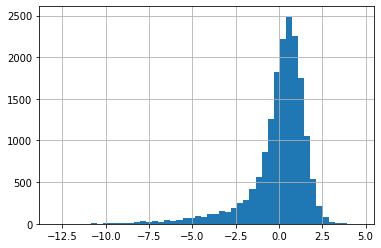

In [6]:
z.loc['ACH-000004'].hist(bins=50)

In [8]:
cells = pd.read_csv('./sample_info_550cells.txt', index_col=0, sep='\t')
aml = [x for x in cells.index if cells.loc[x]['lineage_subtype']=='AML']
zaml = z.loc[aml]
zaml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, ACH-000004 to ACH-000770
Columns: 17407 entries, A1BG to ZZZ3
dtypes: float64(17407)
memory usage: 2.0+ MB


<AxesSubplot:>

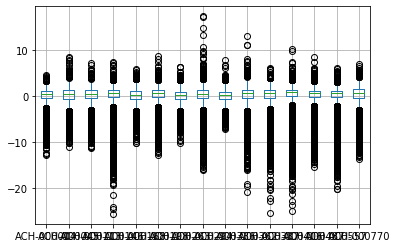

In [10]:
zaml.T.boxplot()

In [26]:
sum(zaml>3)['CHP1']

4

In [27]:
zaml_summary = pd.DataFrame(index=zaml.columns, columns=['numEss','numPSG'], dtype=int)

In [28]:
zaml_summary.head(3)

,numEss,numPSG
A1BG,NaN,NaN
A1CF,NaN,NaN
A2M,NaN,NaN


In [29]:
zaml_summary.numEss = sum(zaml<-3)

In [30]:
zaml_summary.numPSG = sum(zaml>3)

In [31]:
zaml_summary.head(3)

,numEss,numPSG
A1BG,0,1
A1CF,0,0
A2M,0,0


In [33]:
zaml_summary.loc[['CHP1','TP53','ACACA','FASN','GPAT4','SCD','GPX4','SREBF1']]

,numEss,numPSG
CHP1,0,4
TP53,1,4
ACACA,2,4
FASN,0,5
GPAT4,0,6
SCD,6,0
GPX4,9,0
SREBF1,5,0


In [34]:
zaml_summary.to_csv('zscore_aml15screens_summary_countsZgt3.txt', sep='\t', index=True)